# A Comparison of Restricted Boltzmann Machines (RBM) and Sum Product Networks (SPN)

## Introduction

### Restricted Boltzmann machines (RBM)
are energy based models that associate a scalar energy to each variable. The equation is given as:

$Pr(x) = \sum_{h}^{} \frac{exp(-E(x,h))}{z}$

The energy function is defined as:

$E(x,h) = -a^Tx-b^Th-h^TWx$

In the equations, x represents the observed layers and h represents the hidden layers. The chart below shows a plausible RBM.

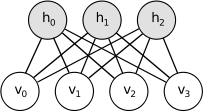

In [4]:
from IPython.display import Image
Image(filename='rbm_representation.png') 

The structure of RBMs makes the visible and hidden units independent from one another. As a result, we can have conditional probabilites. The probability of a specific hidden and visible unit is:

$Pr(h_{i} = 1|x)=\frac{exp(b_{i}+W_{i.}x)}{exp(b_{i}+W_{i.}x)+1} = σ(b_{i}+W_{i.}x)$

$Pr(x_{i} = 1|h)=\frac{exp(a_{i}+W_{.i}h)}{exp(a_{i}+W_{.i}h)+1} = σ(a_{i}+W_{.i}h)$

σ is the sigmoid function:

$σ(x)=\frac{e^x}{e^x+1}$

In order to make an energy based model we define free energy in the visible state as 

$F(x) = -log\sum_{h}^{} {exp(-E(x,h))}$

Which can be rewritten as

$=-a^Tx-\sum_{i}^{}log(1+exp(W_{i.}x+b_{i}))$

Which can be simplified to

$p(x;\theta)=\frac{1}{Z}exp(-F(x)) = \frac{exp(-F(x))}{\sum_{x}^{}exp(-F(\tilde{x}))}$

With a derivative of

$\frac{\partial F(x)}{\partial \theta}-\sum_{\tilde{x}∈N}^{}p(\tilde{x})\frac{\partial F(\tilde{x})}{\partial \theta}$

The x's are the current training data and $\tilde{x}$ are all possible outputs of visible units generated by the model. $\tilde{x}$ is nearly impossible to compute due to its exponential relationship to input size. The algorithim can work if N is a set of samples sampled from the model.

$\frac{\partial F(x)}{\partial \theta}-\frac{1}{|N|}\sum_{\tilde{x}∈N}^{}\frac{\partial F(\tilde{x})}{\partial \theta}$

### Sum Product Networks (SPN)